Bước 1: Đọc và phân tích dữ liệu sơ bộ...

--- Thông tin tập huấn luyện ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31367 entries, 0 to 31366
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31367 non-null  object
 1   label   31367 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 490.2+ KB
None

--- 5 hàng đầu tiên của train.csv ---
                               id  label
0  Train/12/00012_00031_00018.png     12
1   Train/5/00005_00031_00001.png      5
2  Train/12/00012_00069_00028.png     12
3  Train/13/00013_00052_00022.png     13
4  Train/18/00018_00017_00024.png     18

--- Phân phối số lượng mẫu của các lớp ---
label
0      168
1     1776
2     1800
3     1128
4     1584
5     1488
6      336
7     1152
8     1128
9     1176
10    1608
11    1056
12    1680
13    1728
14     624
15     504
16     336
17     888
18     960
19     168
20     288
21     264
22     312
23     408
24     216
25   

C:\Users\1650ti\AppData\Local\Temp\ipykernel_11468\2918414736.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


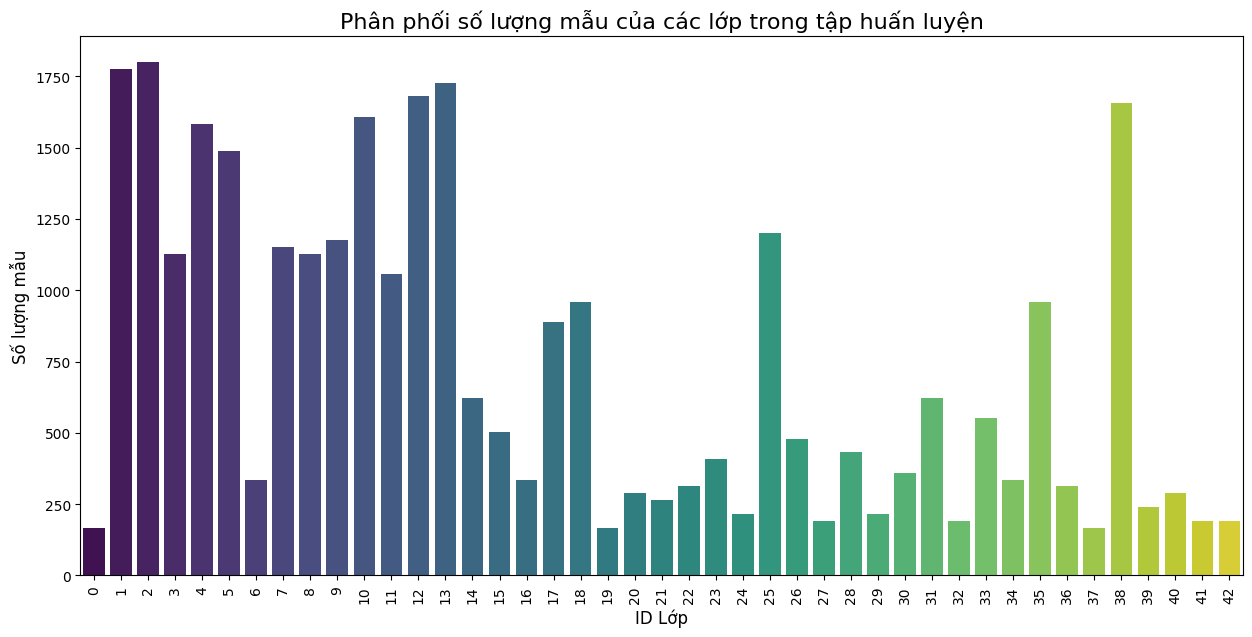

In [1]:
import pandas as pd
import numpy as np
import cv2
import os
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# ==============================================================================
# 1. ĐỌC VÀ PHÂN TÍCH DỮ LIỆU SƠ BỘ
# ==============================================================================
print("Bước 1: Đọc và phân tích dữ liệu sơ bộ...")

# Đường dẫn đến thư mục chứa các tệp đã được giải nén
data_dir = r'D:\Học Máy\archive'

# Tạo đường dẫn đầy đủ đến file CSV
train_csv_path = os.path.join(data_dir, 'train.csv')
test_csv_path = os.path.join(data_dir, 'test.csv')
meta_csv_path = os.path.join(data_dir, 'meta.csv')

# Lấy nội dung từ file CSV
train_df = pd.read_csv(train_csv_path)
test_df = pd.read_csv(test_csv_path)
meta_df = pd.read_csv(meta_csv_path)

print("\n--- Thông tin tập huấn luyện ---")
print(train_df.info())
print("\n--- 5 hàng đầu tiên của train.csv ---")
print(train_df.head())

# Phân tích sự mất cân bằng lớp
class_counts = train_df['label'].value_counts().sort_index()
print("\n--- Phân phối số lượng mẫu của các lớp ---")
print(class_counts)


# Trực quan hóa phân phối lớp
plt.figure(figsize=(15, 7))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title("Phân phối số lượng mẫu của các lớp trong tập huấn luyện", fontsize=16)
plt.xlabel("ID Lớp", fontsize=12)
plt.ylabel("Số lượng mẫu", fontsize=12)
plt.xticks(rotation=90)
plt.show()


In [2]:
# ==============================================================================
# 2 & 3. TIỀN XỬ LÝ VÀ TẢI DỮ LIỆU (ĐÃ HOÀN THIỆN)
# ==============================================================================
print("Bước 2 & 3: Tiền xử lý và tải dữ liệu...")

# Import tất cả các thư viện cần thiết
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
from PIL import Image, ImageFilter
from sklearn.model_selection import train_test_split

# Giả sử bạn đã chạy Bước 1 và các biến này đã được định nghĩa
data_dir = r'D:\Học Máy\archive'
train_df = pd.read_csv(os.path.join(data_dir, 'Train.csv'))


def preprocess_image(img_path, target_size=(32, 32)):
    """
    Hàm đọc, resize, làm sắc nét và chuẩn hóa ảnh bằng Pillow.
    """
    if not os.path.exists(img_path):
        print(f"Lỗi: Không tìm thấy file tại đường dẫn: {img_path}")
        return None
        
    try:
        img = Image.open(img_path)
        img = img.convert("RGB").resize(target_size)
        img = img.filter(ImageFilter.SHARPEN)
        img_array = np.array(img) / 255.0  
        return img_array
    except Exception as e:
        print(f"Lỗi khi xử lý file {img_path}: {e}")
        return None

# Tải và xử lý toàn bộ tập dữ liệu
X_data = []
y_data = []

print("Đang tải và tiền xử lý ảnh từ tập huấn luyện...")

for index, row in tqdm(train_df.iterrows(), total=len(train_df)):
    img_path = os.path.normpath(os.path.join(data_dir, row['id']))
    img = preprocess_image(img_path)
    
    if img is not None:
        X_data.append(img)
        y_data.append(row['label'])

if not X_data:
    print("\nLỖI NGHIÊM TRỌNG: KHÔNG TẢI ĐƯỢC BẤT KỲ ẢNH NÀO.")
    print("Vui lòng kiểm tra lại đường dẫn `data_dir` và cấu trúc thư mục của bạn.")
else:
    X_data = np.array(X_data)
    y_data = np.array(y_data)

    # Chia tập dữ liệu thành tập huấn luyện và validation
    X_train, X_val, y_train, y_val = train_test_split(
        X_data, y_data, test_size=0.2, random_state=42, stratify=y_data
    )

    print(f"\n--- Kết quả sau khi tiền xử lý và chia tập ---")
    print(f"Số mẫu huấn luyện: {len(X_train)}")
    print(f"Số mẫu validation: {len(X_val)}")
    print(f"Hình dạng dữ liệu huấn luyện: {X_train.shape}")
    print(f"Hình dạng nhãn huấn luyện: {y_train.shape}")

Bước 2 & 3: Tiền xử lý và tải dữ liệu...
Đang tải và tiền xử lý ảnh từ tập huấn luyện...


100%|██████████| 31367/31367 [00:16<00:00, 1853.96it/s]



--- Kết quả sau khi tiền xử lý và chia tập ---
Số mẫu huấn luyện: 25093
Số mẫu validation: 6274
Hình dạng dữ liệu huấn luyện: (25093, 32, 32, 3)
Hình dạng nhãn huấn luyện: (25093,)


In [3]:
# --- BƯỚC 4: XÂY DỰNG VÀ HUẤN LUYỆN MÔ HÌNH CNN ---

print("\nBước 4: Xây dựng và huấn luyện mô hình CNN...")

# Import thư viện cần thiết
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import numpy as np

# Xác định số lượng lớp đầu ra từ dữ liệu đã chia
num_classes = len(np.unique(y_train))

# Xây dựng mô hình
model = models.Sequential([
    # Lớp tích chập (Convolutional Layer) đầu tiên:
    # 32 bộ lọc, kích thước 3x3, hàm kích hoạt ReLU
    # Input shape: kích thước ảnh 32x32 và 3 kênh màu (RGB)
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    # Lớp gộp (Pooling Layer) đầu tiên để giảm kích thước ảnh
    layers.MaxPooling2D((2, 2)),
    
    # Lớp tích chập thứ hai: 64 bộ lọc
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Lớp tích chập thứ ba: 64 bộ lọc
    layers.Conv2D(64, (3, 3), activation='relu'),
    
    # Lớp làm phẳng (Flatten) để chuyển dữ liệu ảnh 2D thành vector 1D
    layers.Flatten(),
    
    # Lớp kết nối đầy đủ (Dense Layer) đầu tiên: 64 nơ-ron, hàm kích hoạt ReLU
    layers.Dense(64, activation='relu'),
    
    # Lớp đầu ra (Output Layer): số nơ-ron bằng số lớp (43), hàm kích hoạt softmax
    # Softmax biến đầu ra thành xác suất cho từng lớp
    layers.Dense(num_classes, activation='softmax')
])

# Hiển thị tóm tắt cấu trúc mô hình
model.summary()

# --- Biên dịch và Huấn luyện mô hình ---
# Sử dụng 'sparse_categorical_crossentropy' vì nhãn y_train đang ở dạng số nguyên
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x=X_train, 
                    y=y_train, 
                    epochs=10, 
                    validation_data=(X_val, y_val))

print("\n Đã hoàn thành huấn luyện mô hình!")


Bước 4: Xây dựng và huấn luyện mô hình CNN...


c:\Users\1650ti\anaconda3\envs\machine_learning\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │         2,795 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,715 (487.17 KB)

 Trainable params: 124,715 (487.17 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
785/785 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.4181 - loss: 2.2391 - val_accuracy: 0.9222 - val_loss: 0.2924
Epoch 2/10
785/785 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9370 - loss: 0.2263 - val_accuracy: 0.9611 - val_loss: 0.1575
Epoch 3/10
785/785 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9726 - loss: 0.1004 - val_accuracy: 0.9764 - val_loss: 0.0990
Epoch 4/10
785/785 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9840 - loss: 0.0568 - val_accuracy: 0.9820 - val_loss: 0.0868
Epoch 5/10
785/785 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9892 - loss: 0.0405 - val_accuracy: 0.9815 - val_loss: 0.0841
Epoch 6/10
785/785 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9900 - loss: 0.0339 - val_accuracy: 0.9841 - val_loss: 0.0852
Epoch 7/10
785/785 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9899 - loss: 0.0336 - val_accuracy: 0.9828 - val_loss: 0.0945
Epoch 8/10
785/785 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9955 - loss: 0.0161 - val_


Bước 5: Dự đoán biển báo trong tập kiểm tra...
Đang tải và tiền xử lý 1000 ảnh từ tập kiểm tra...


100%|██████████| 1000/1000 [00:00<00:00, 1759.16it/s]


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step

--- Hiển thị kết quả dự đoán cho 5 ảnh ngẫu nhiên ---


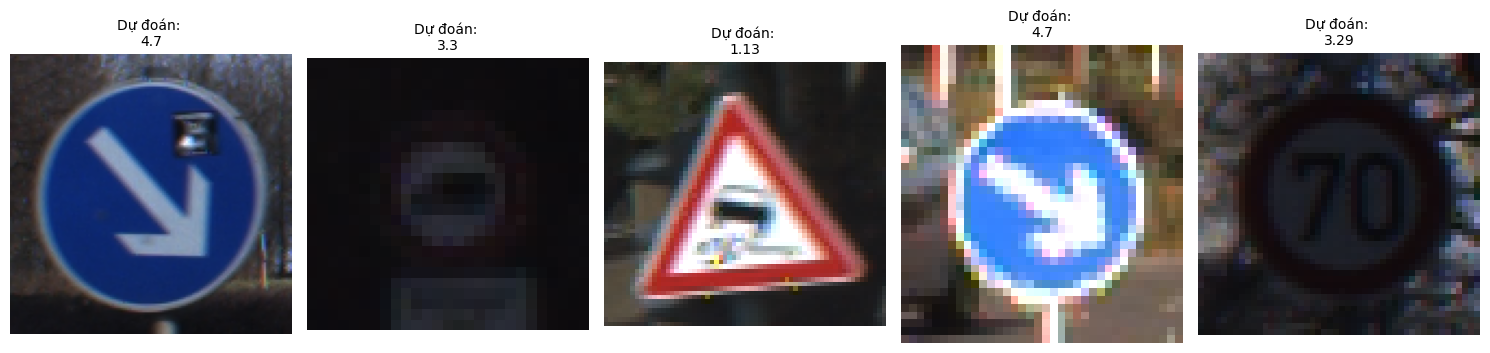


 Đã hoàn thành dự án!


In [4]:
# ==============================================================================
# 5. DỰ ĐOÁN VÀ HIỂN THỊ KẾT QUẢ
# ==============================================================================
print("\nBước 5: Dự đoán biển báo trong tập kiểm tra...")

# Import các thư viện cần thiết
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model


# Đường dẫn đến thư mục chứa các tệp
data_dir = r'D:\Học Máy\archive'

# Định nghĩa hàm tiền xử lý ảnh
def preprocess_image(image_path, target_size=(32, 32)):
    try:
        img = Image.open(image_path)
        img = img.convert("RGB").resize(target_size)
        img_array = np.array(img) / 255.0
        return img_array
    except Exception as e:
        print(f"Lỗi khi xử lý file {image_path}: {e}")
        return None

# Tải dữ liệu từ tệp Test.csv và Meta.csv
test_df = pd.read_csv(os.path.join(data_dir, 'Test.csv'))
meta_df = pd.read_csv(os.path.join(data_dir, 'meta.csv'))
class_names = dict(zip(meta_df['ClassId'], meta_df['SignId']))

# Tải và tiền xử lý 1000 ảnh từ tập kiểm tra
test_images = []
test_paths = []
test_df_subset = test_df.sample(n=1000, random_state=42)

print("Đang tải và tiền xử lý 1000 ảnh từ tập kiểm tra...")
for index, row in tqdm(test_df_subset.iterrows(), total=len(test_df_subset)):
    img_path = os.path.normpath(os.path.join(data_dir, row['id']))
    img = preprocess_image(img_path)
    if img is not None:
        test_images.append(img)
        test_paths.append(img_path)

if not test_images:
    print("LỖI: Không tải được dữ liệu kiểm tra.")
    exit()

X_test = np.array(test_images)

# Dự đoán trên tập kiểm tra
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

# ==================================================================
# HIỂN THỊ KẾT QUẢ DỰ ĐOÁN
# ==================================================================
print("\n--- Hiển thị kết quả dự đoán cho 5 ảnh ngẫu nhiên ---")
indices = np.random.choice(len(test_images), 5, replace=False)
plt.figure(figsize=(15, 8))
for i, idx in enumerate(indices, 1):
    original_img = Image.open(test_paths[idx])
    predicted_class_id = predicted_classes[idx]
    predicted_sign_name = class_names.get(predicted_class_id, "Unknown")
    plt.subplot(1, 5, i)
    plt.imshow(original_img)
    plt.title(f"Dự đoán: \n{predicted_sign_name}", fontsize=10)
    plt.axis('off')
plt.tight_layout()
plt.show()

print("\n Đã hoàn thành dự án!")

Bắt đầu quy trình hoàn chỉnh...

1. Tiền xử lý và tải dữ liệu huấn luyện...


100%|██████████| 31367/31367 [00:17<00:00, 1789.91it/s]


✅ Đã hoàn thành tải và chia dữ liệu huấn luyện.

2. Xây dựng và huấn luyện mô hình...


c:\Users\1650ti\anaconda3\envs\machine_learning\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ Đã hoàn thành huấn luyện mô hình.

3. Dự đoán và hiển thị kết quả...
Đang tải và tiền xử lý TOÀN BỘ 7842 ảnh từ tập kiểm tra...


100%|██████████| 7842/7842 [00:04<00:00, 1876.64it/s]


246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

--- Kết quả dự đoán cho 5 ảnh ngẫu nhiên ---


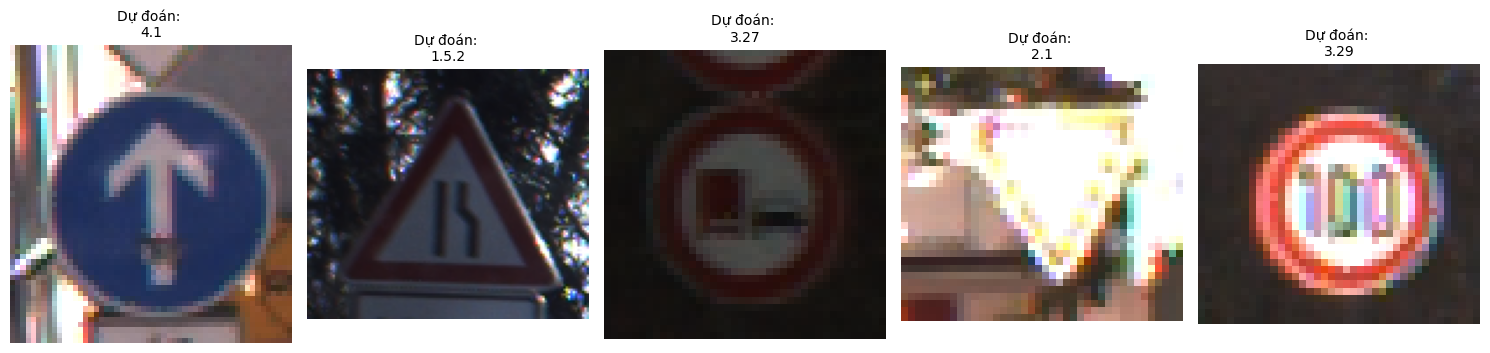


Đang tạo file submission.csv để nộp bài...
✅ Đã tạo file submission: D:\Học Máy\submission.csv


In [ ]:
print("Bắt đầu quy trình hoàn chỉnh...")

# ------------------------------------------------------------------------------
# Import các thư viện cần thiết
# ------------------------------------------------------------------------------
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
from PIL import Image, ImageFilter
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Đường dẫn đến thư mục chứa các tệp đã giải nén
data_dir = r'D:\Học Máy\archive'

# ------------------------------------------------------------------------------
# 1. TIỀN XỬ LÝ VÀ TẢI DỮ LIỆU HUẤN LUYỆN
# ------------------------------------------------------------------------------
print("\n1. Tiền xử lý và tải dữ liệu huấn luyện...")

train_df = pd.read_csv(os.path.join(data_dir, 'Train.csv'))

def preprocess_image(img_path, target_size=(32, 32)):
    """Đọc, resize và chuẩn hóa ảnh."""
    if not os.path.exists(img_path):
        return None
    try:
        img = Image.open(img_path).convert("RGB").resize(target_size)
        img = img.filter(ImageFilter.SHARPEN)
        img_array = np.array(img) / 255.0
        return img_array
    except Exception as e:
        print(f"Lỗi khi xử lý file {img_path}: {e}")
        return None

X_data = []
y_data = []

for index, row in tqdm(train_df.iterrows(), total=len(train_df)):
    img_path = os.path.normpath(os.path.join(data_dir, row['id']))
    img = preprocess_image(img_path)
    if img is not None:
        X_data.append(img)
        y_data.append(row['label'])

if not X_data:
    print("LỖI: Không tải được dữ liệu huấn luyện.")
    exit()

X_data = np.array(X_data)
y_data = np.array(y_data)
X_train, X_val, y_train, y_val = train_test_split(
    X_data, y_data, test_size=0.2, random_state=42, stratify=y_data
)

print("✅ Đã hoàn thành tải và chia dữ liệu huấn luyện.")

# ------------------------------------------------------------------------------
# 2. XÂY DỰNG VÀ HUẤN LUYỆN MÔ HÌNH
# ------------------------------------------------------------------------------
print("\n2. Xây dựng và huấn luyện mô hình...")

num_classes = len(np.unique(y_train))
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), verbose=0)
print("✅ Đã hoàn thành huấn luyện mô hình.")

# ------------------------------------------------------------------------------
# 3. DỰ ĐOÁN VÀ HIỂN THỊ KẾT QUẢ CHO TẤT CẢ ẢNH
# ------------------------------------------------------------------------------
print("\n3. Dự đoán và hiển thị kết quả...")

test_df = pd.read_csv(os.path.join(data_dir, 'Test.csv'))
meta_df = pd.read_csv(os.path.join(data_dir, 'meta.csv'))
class_names = dict(zip(meta_df['ClassId'], meta_df['SignId']))

test_images = []
test_paths = []

print("Đang tải và tiền xử lý TOÀN BỘ 7842 ảnh từ tập kiểm tra...")
for index, row in tqdm(test_df.iterrows(), total=len(test_df)):
    img_path = os.path.normpath(os.path.join(data_dir, row['id']))
    img = preprocess_image(img_path)
    if img is not None:
        test_images.append(img)
        test_paths.append(img_path)

if not test_images:
    print("LỖI: Không tải được dữ liệu kiểm tra.")
    exit()

X_test = np.array(test_images)
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

print("\n--- Kết quả dự đoán cho 5 ảnh ngẫu nhiên ---")
indices = np.random.choice(len(test_images), 5, replace=False)
plt.figure(figsize=(15, 8))
for i, idx in enumerate(indices, 1):
    original_img = Image.open(test_paths[idx])
    predicted_class_id = predicted_classes[idx]
    predicted_sign_name = class_names.get(predicted_class_id, "Unknown")
    plt.subplot(1, 5, i)
    plt.imshow(original_img)
    plt.title(f"Dự đoán: \n{predicted_sign_name}", fontsize=10)
    plt.axis('off')
plt.tight_layout()
plt.show()

# ==================================================================
# TẠO FILE SUBMISSION
# ==================================================================
print("\nĐang tạo file submission.csv để nộp bài...")

# Tạo DataFrame với các cột id và ClassId
# LƯU Ý: TÊN CỘT 'Filename' ĐÃ ĐƯỢC THAY THÀNH 'id'
submission_df = pd.DataFrame({
    'id': test_df['id'],
    'ClassId': predicted_classes
})

# Xuất DataFrame ra file CSV
submission_path = os.path.join(os.path.dirname(data_dir), 'submission.csv')
submission_df.to_csv(submission_path, index=False)

print(f"✅ Đã tạo file submission: {submission_path}")